# Computer Vision Laboratory 5 (06/02/2025)

# Amiya Chowdhury Roll: 122CS0067


In [1]:
import tensorflow as tf
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist 
import seaborn as sns
from tensorflow.keras.initializers import RandomNormal

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
# Load the Mnist data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of testing examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of testing examples : 10000 and each image is of shape (28, 28)


In [5]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of test examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of test examples : 10000 and each image is of shape (784)


In [6]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [7]:
print("Class label of first image :", y_train[0])


Y_train = utils.to_categorical(y_train, 10) 
Y_test = utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h2>  Softmax classifier  </h2>

In [8]:
import keras
from keras import optimizers
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation, Dropout

In [9]:
output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 10

In [10]:
model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, steps_per_epoch=50, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))



Epoch 1/10


50/50 [==============================] - 1s 17ms/step - loss: 2.2283 - accuracy: 0.1568 - val_loss: 2.0771 - val_accuracy: 0.2648
Epoch 2/10
50/50 [==============================] - 1s 12ms/step - loss: 1.9620 - accuracy: 0.3688 - val_loss: 1.8293 - val_accuracy: 0.4584
Epoch 3/10
50/50 [==============================] - 1s 12ms/step - loss: 1.7165 - accuracy: 0.5231 - val_loss: 1.5789 - val_accuracy: 0.5880
Epoch 4/10
50/50 [==============================] - 1s 12ms/step - loss: 1.4802 - accuracy: 0.6321 - val_loss: 1.3514 - val_accuracy: 0.6902
Epoch 5/10
50/50 [==============================] - 1s 12ms/step - loss: 1.2743 - accuracy: 0.7176 - val_loss: 1.1610 - val_accuracy: 0.7584
Epoch 6/10
50/50 [==============================] - 1s 12ms/step - loss: 1.1078 - accuracy: 0.7687 - val_loss: 1.0125 - val_accuracy: 0.7977
Epoch 7/10
50/50 [==============================] - 1s 12ms/step - loss: 0.9803 - accuracy: 0.7949 - val_loss: 0.9007 - val_accuracy: 0.8193
Epoch 8/1

Test score: 0.6978126168251038
Test accuracy: 0.8496999740600586


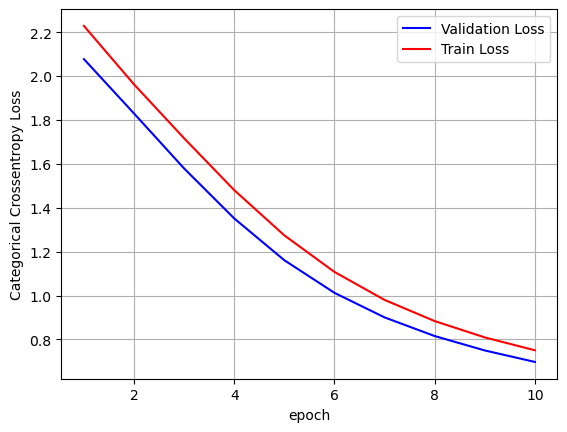

In [11]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

 <h3>  MLP + Sigmoid activation + SGDOptimizer </h3>

In [12]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 128)               65664     
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468874 (1.79 MB)
Trainable params: 468874 (1.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 4s 7ms/step - loss: 2.2693 - accuracy: 0.2256 - val_loss: 2.2245 - val_accuracy: 0.3547
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 2.1823 - accuracy: 0.4566 - val_loss: 2.1290 - val_accuracy: 0.5691
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 2.0705 - accuracy: 0.5936 - val_loss: 1.9929 - val_accuracy: 0.6713
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 1.9109 - accuracy: 0.6601 - val_loss: 1.8031 - val_accuracy: 0.6776
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 1.7014 - accuracy: 0.6985 - val_loss: 1.5724 - val_accuracy: 0.7100
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 1.4711 - accuracy: 0.7327 - val_loss: 1.3434 - val_accuracy: 0.7543
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 1.2599 - accuracy: 0.7584 - val_loss: 1.1487 - val_accuracy: 0.7831
Epoch 

Test score: 0.7873236536979675
Test accuracy: 0.8245000243186951


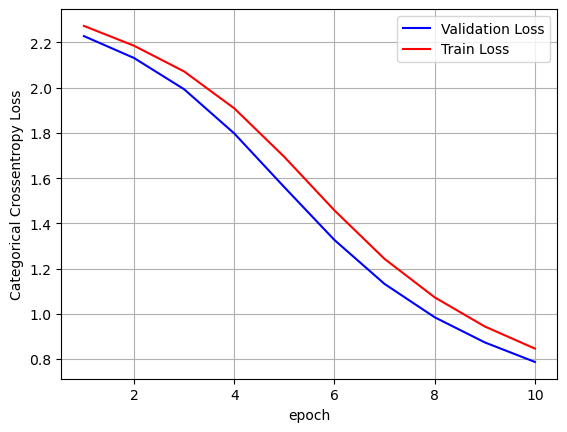

In [56]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14344\568197572.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, 1)


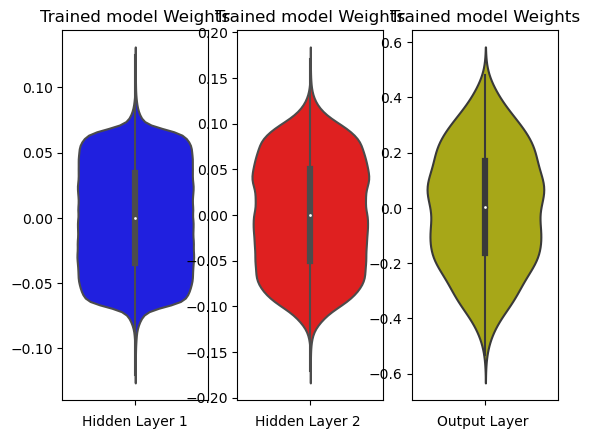

In [57]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

Model-1: 4 hidden layers having 128, 64, 32, 16 number of neurons respectively with activation function sigmoid, tanh, relu and selu respectively and dropout rate set to 0.5, 0.4, 0.3, 0.1 respectively. Use optimizer as SGD with batch size set to 32.

In [14]:
output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 5

In [15]:
def  train():
    model1 = Sequential()
    model1.add(Dense(128, input_dim=input_dim, activation='sigmoid'))
    model1.add(Dropout(0.5))

    model1.add(Dense(64, input_dim=input_dim, activation='tanh'))
    model1.add(Dropout(0.4))

    model1.add(Dense(32, input_dim=input_dim, activation='relu'))
    model1.add(Dropout(0.3))

    model1.add(Dense(16, input_dim=input_dim, activation='selu'))
    model1.add(Dropout(0.1))

    model1.add(Dense(10, input_dim=input_dim, activation='softmax'))

    model1.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
    model1.fit(X_train, Y_train, batch_size=32, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
    score = model1.evaluate(X_test, Y_test, verbose=0) 
    return score[1]

In [16]:
avg_accuracy = 0
for _ in range(3):
    score = train()
    avg_accuracy += score
avg_accuracy /= 3
print('Test accuracy:', avg_accuracy)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2376 - accuracy: 0.1661 - val_loss: 1.6430 - val_accuracy: 0.4988
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6503 - accuracy: 0.3821 - val_loss: 0.9992 - val_accuracy: 0.6815
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2387 - accuracy: 0.5487 - val_loss: 0.7411 - val_accuracy: 0.7847
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0314 - accuracy: 0.6413 - val_loss: 0.6184 - val_accuracy: 0.8286
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9101 - accuracy: 0.6923 - val_loss: 0.5376 - val_accuracy: 0.8485
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3095 - accuracy: 0.1282 - val_loss: 2.0898 - val_accuracy: 0.2923
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.8817 - accuracy: 0.3013 - val_loss: 1.1614 - val_accuracy: 0.6164

In [38]:
def  train1():
    model2 = Sequential()
    model2.add(Dense(128, input_dim=input_dim, activation='sigmoid'))
    model2.add(Dropout(0.5))

    model2.add(Dense(64, input_dim=input_dim, activation='tanh'))
    model2.add(Dropout(0.4))

    model2.add(Dense(32, input_dim=input_dim, activation='relu'))
    model2.add(Dropout(0.3))

    model2.add(Dense(16, input_dim=input_dim, activation='selu'))
    model2.add(Dropout(0.1))

    model2.add(Dense(10, input_dim=input_dim, activation='softmax'))

    model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    model2.fit(X_train, Y_train, batch_size=32, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
    score = model2.evaluate(X_test, Y_test, verbose=0) 
    return score[1]

In [37]:
def  train2():
    model3 = Sequential()
    model3.add(Dense(128, input_dim=input_dim, activation='sigmoid'))
    model3.add(Dropout(0.5))

    model3.add(Dense(64, input_dim=input_dim, activation='tanh'))
    model3.add(Dropout(0.4))

    model3.add(Dense(32, input_dim=input_dim, activation='relu'))
    model3.add(Dropout(0.3))

    model3.add(Dense(16, input_dim=input_dim, activation='selu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(10, input_dim=input_dim, activation='softmax'))

    model3.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.AdamW(learning_rate=0.01),metrics=['accuracy'])
    model3.fit(X_train, Y_train, batch_size=32, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
    score = model3.evaluate(X_test, Y_test, verbose=0) 
    return score[1]

In [36]:
def  train3():
    model4 = Sequential()
    model4.add(Dense(128, input_dim=input_dim, activation='sigmoid'))
    model4.add(Dropout(0.5))

    model4.add(Dense(64, input_dim=input_dim, activation='tanh'))
    model4.add(Dropout(0.4))

    model4.add(Dense(32, input_dim=input_dim, activation='relu'))
    model4.add(Dropout(0.3))

    model4.add(Dense(16, input_dim=input_dim, activation='selu'))
    model4.add(Dropout(0.1))

    model4.add(Dense(10, input_dim=input_dim, activation='softmax'))

    model4.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Nadam(learning_rate=0.01),metrics=['accuracy'])
    model4.fit(X_train, Y_train, batch_size=32, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
    score = model4.evaluate(X_test, Y_test, verbose=0) 
    return score[1]

In [39]:
avg_accuracies=np.array([0.,0.,0.,0.])
trainers=[train,train1,train2,train3]
for _ in range(10):
    for i in range(4):
        score=trainers[i]()
        avg_accuracies[i] += score
avg_accuracies /= 10
for i in range(4):
    print(f'Test accuracy of Model{i}: {avg_accuracies[i]}')


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2397 - accuracy: 0.1699 - val_loss: 1.6860 - val_accuracy: 0.3917
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6267 - accuracy: 0.3887 - val_loss: 0.9807 - val_accuracy: 0.6784
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2306 - accuracy: 0.5432 - val_loss: 0.7584 - val_accuracy: 0.7755
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0305 - accuracy: 0.6400 - val_loss: 0.5904 - val_accuracy: 0.8358
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8925 - accuracy: 0.6996 - val_loss: 0.5070 - val_accuracy: 0.8624
Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.8633 - accuracy: 0.7160 - val_loss: 0.2776 - val_accuracy: 0.9217
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4376 - accuracy: 0.8766 - val_loss: 0.2218 - val_accuracy: 0.9366

<h2> Hyper-parameter tuning of Keras models using Sklearn </h2>

2.	Tune the hyperparameters using kerastuner to select the best learning rate among the set {0.1, 0.01, 0.15} with batch size varying between {4,8,16} and first hidden layer neurons varying between 250 to 260 with a step value of 2. 2nd, 3rd and 4th hidden layer contains 16, 8, 4 numbers of neurons respectively. The four layers have activation functions sigmoid, tanh, relu, and selu, respectively. Use optimizer as SGD and find the best hyperparameters to predict the MNIST test data.

In [43]:
print()

In [45]:
import keras_tuner

In [48]:
units=[i for i in range(250,261,2)]
units

[250, 252, 254, 256, 258, 260]

In [101]:
def train_tuner(hp):
    model5 = Sequential()
    model5.add(Dense(units=hp.Choice('units',units), activation='sigmoid'))
    model5.add(Dense(16, activation='tanh'))
    model5.add(Dense(8, activation='relu'))
    model5.add(Dense(4, activation='selu'))
    model5.add(Dense(10, activation='softmax'))
    batch_size=hp.Choice('batch_size',[4,8,16])
    learning_rate = hp.Choice('learning_rate',[0.1,0.01,0.15])
    model5.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=learning_rate),metrics=["accuracy"])
    return model5


In [102]:
train_tuner(keras_tuner.HyperParameters())

In [103]:
tuner = keras_tuner.RandomSearch(hypermodel=train0_tuner,objective="val_accuracy")

In [104]:
tuner.search_space_summary()

Search space summary
Default search space size: 3
units (Choice)
{'default': 250, 'conditions': [], 'values': [250, 252, 254, 256, 258, 260], 'ordered': True}
batch_size (Choice)
{'default': 4, 'conditions': [], 'values': [4, 8, 16], 'ordered': True}
learning_rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.01, 0.15], 'ordered': True}


In [105]:
tuner.search(X_train, Y_train, epochs=3, validation_data=(X_test, Y_test))

Trial 10 Complete [00h 00m 18s]
val_accuracy: 0.9409999847412109

Best val_accuracy So Far: 0.9487000107765198
Total elapsed time: 00h 02m 56s


In [110]:
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 07 summary
Hyperparameters:
units: 252
batch_size: 4
learning_rate: 0.15
Score: 0.9487000107765198

Trial 04 summary
Hyperparameters:
units: 252
batch_size: 8
learning_rate: 0.15
Score: 0.9433000087738037

Trial 09 summary
Hyperparameters:
units: 260
batch_size: 4
learning_rate: 0.15
Score: 0.9409999847412109

Trial 05 summary
Hyperparameters:
units: 254
batch_size: 4
learning_rate: 0.1
Score: 0.9369000196456909

Trial 03 summary
Hyperparameters:
units: 252
batch_size: 8
learning_rate: 0.1
Score: 0.9325000047683716

Trial 08 summary
Hyperparameters:
units: 258
batch_size: 16
learning_rate: 0.1
Score: 0.9276999831199646

Trial 01 summary
Hyperparameters:
units: 256
batch_size: 4
learning_rate: 0.01
Score: 0.8496000170707703

Trial 02 summary
Hyperparameters:
units: 260
batch_size: 8
learning_rate: 0.01
Score: 0.847100019454956

Trial 06 summary
Hyperparameters:
uni

In [115]:
best_hps = tuner.get_best_hyperparameters(5)

model = train_tuner(best_hps[0])
x_all = np.concatenate((X_train, X_test))
y_all = np.concatenate((Y_train, Y_test))
model.fit(x=x_all, y=y_all, epochs=20)


Epoch 1/20
2188/2188 [==============================] - 6s 2ms/step - loss: 0.6590 - accuracy: 0.7898
Epoch 2/20
2188/2188 [==============================] - 5s 2ms/step - loss: 0.2918 - accuracy: 0.9202
Epoch 3/20
2188/2188 [==============================] - 5s 2ms/step - loss: 0.2056 - accuracy: 0.9443
Epoch 4/20
2188/2188 [==============================] - 5s 2ms/step - loss: 0.1581 - accuracy: 0.9560
Epoch 5/20
2188/2188 [==============================] - 5s 2ms/step - loss: 0.1282 - accuracy: 0.9639
Epoch 6/20
2188/2188 [==============================] - 5s 2ms/step - loss: 0.1051 - accuracy: 0.9709
Epoch 7/20
2188/2188 [==============================] - 5s 2ms/step - loss: 0.0927 - accuracy: 0.9736
Epoch 8/20
2188/2188 [==============================] - 5s 2ms/step - loss: 0.0771 - accuracy: 0.9786
Epoch 9/20
2188/2188 [==============================] - 5s 2ms/step - loss: 0.0677 - accuracy: 0.9799
Epoch 10/20
2188/2188 [==============================] - 5s 2ms/step - loss: 0.061

In [116]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0156 - accuracy: 0.9957


[0.01564526930451393, 0.9957000017166138]